In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [3]:
movies=pd.read_csv('movies.csv')
credits= pd.read_csv('credits.csv')

In [4]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [5]:
#credit.head(1)['crew'].values
credits.head(1)
#cast: all the actors in the movie
#crew: director, writer, editor, producer etc

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


## MERGE THE TWO DATASETS

In [6]:
#merge the dataframes based on title(any common cloumn)
movies.merge(credits, on='title').shape

(4809, 23)

In [7]:
credits.shape
#movies.shape=> (4803, 20)

(4803, 4)

In [8]:
movies=movies.merge(credits, on='title')

In [9]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


# DATA PROCESSING

#### we are making a content based recommender system, which uses tags, therefore while selecting useful columns think in terms of : can i create a tag from this and if it can be a summary point

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

# useful columns:

In [11]:
# genre
# id
# keywords
# title
# overview
# cast
# crew
#og lang
#popularity
#release date


In [12]:
movies = movies[['movie_id', 'title','overview','genres','keywords','cast','crew','original_language','popularity','release_date']]

In [13]:
movies.head(1)
# below is the main dataframe(halfpart)

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,150.437577,2009-12-10


#### checking for missing data

In [14]:
movies.isnull().sum()

movie_id             0
title                0
overview             3
genres               0
keywords             0
cast                 0
crew                 0
original_language    0
popularity           0
release_date         1
dtype: int64

In [15]:
movies.dropna(inplace = True)

In [16]:
movies.isnull().sum()

movie_id             0
title                0
overview             0
genres               0
keywords             0
cast                 0
crew                 0
original_language    0
popularity           0
release_date         0
dtype: int64

In [17]:
# check for duplicate

In [18]:
movies.duplicated().sum()

0

In [19]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [20]:
# form recquired: ['Action','Adventure']
# current form: list of dictionary

In [21]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [22]:
def convert(obj):
    L= []
    for i in ast.literal_eval(obj): 
        L.append(i['name'])
    return L

In [23]:
movies['genres'] = movies['genres'].apply(convert)

In [24]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en,43.926995,2012-03-07


In [25]:
movies['keywords']= movies['keywords'].apply(convert)

In [26]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en,43.926995,2012-03-07


In [27]:
# from cast, we only want the first three actors

In [28]:
#{} => dictionary 

In [29]:
def convert3(obj):
    L= []
    counter = 0
    for i in ast.literal_eval(obj): 
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
             break
        
    return L

In [30]:
movies['cast'] = movies['cast'].apply(convert3)

In [31]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en,43.926995,2012-03-07


In [32]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [33]:
# we need the name of the dictionary having department as direction

In [34]:
def fetch_director(obj):
    L= []
    for i in ast.literal_eval(obj): 
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [35]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [36]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],en,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],en,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],en,43.926995,2012-03-07


In [37]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [38]:
movies.head()


,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],en,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],en,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],en,43.926995,2012-03-07


# Generating artificial colums:

In [39]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime
import random

In [40]:
# Generate synthetic `userds` so each user belongs to 2–3 clusters (fixed age logic)
# Based on 20 predefined cluster summaries; each user’s 40 interactions split among 2–3 clusters

import pandas as pd
import numpy as np
from datetime import datetime
import random

# 1. Copy existing movies DataFrame
movies_full = movies.copy()

# 2. Define 20 cluster templates (each user assigned to multiple clusters)
cluster_definitions = {
    0:  {"genres": ["comedy"],        "weekdays": [4, 5],            "app": ["netflix", "hulu"],            "age_range": (18, 35), "country": []},
    1:  {"genres": ["horror"],        "weekdays": [4, 5, 6],         "month": [10],                        "app": ["hulu"],                         "age_range": (20, 40), "country": ["USA"]},
    2:  {"genres": ["romance"],       "weekdays": [5, 6],            "month": [2],                         "app": ["netflix", "amazon_prime"],    "age_range": (18, 30), "country": []},
    3:  {"genres": ["action"],        "weekdays": list(range(7)),    "popularity": (10.0, 50.0),          "app": ["amazon_prime", "hulu"],       "age_range": (25, 50), "country": []},
    4:  {"genres": ["family"],        "weekdays": [5, 6],            "app": ["disney_plus"],              "age_range": (5, 15),   "country": ["USA", "Canada"]},
    5:  {"genres": ["drama"],         "weekdays": [0, 1, 2],         "popularity": (0.0, 20.0),           "app": ["netflix"],                    "age_range": (30, 60), "country": []},
    6:  {"genres": ["animation"],     "weekdays": list(range(7)),    "age_range": (5, 20),                  "app": ["disney_plus", "netflix"],    "country": []},
    7:  {"genres": ["documentary"],   "weekdays": [2, 3],            "app": ["hulu"],                      "age_range": (25, 65), "country": ["UK", "Australia"]},
    8:  {"genres": ["sci-fi"],        "weekdays": [4],               "app": ["amazon_prime"],               "age_range": (20, 40), "country": []},
    9:  {"genres": ["drama", "romance"], "weekdays": [2],            "app": ["netflix", "amazon_prime"],   "age_range": (18, 40), "country": ["India"]},
    10: {"genres": ["comedy", "romance"], "weekdays": [5, 6],         "app": ["netflix"],                    "age_range": (18, 30), "country": ["India", "UK"]},
    11: {"genres": ["horror"],        "month": [10],               "app": ["hulu"],                       "age_range": (20, 40), "country": []},
    12: {"genres": ["adventure"],     "popularity": (5.0, 15.0),   "app": ["amazon_prime", "hulu"],      "age_range": (25, 45), "country": []},
    13: {"genres": ["crime"],         "age_range": (25, 40),        "app": ["netflix", "amazon_prime"],   "weekdays": [3, 4],   "country": []},
    14: {"genres": ["fantasy"],       "app": ["amazon_prime"],     "weekdays": [6],                        "age_range": (18, 35), "country": []},
    15: {"genres": ["mystery"],       "weekdays": [0],              "app": ["netflix"],                    "age_range": (30, 50), "country": []},
    16: {"genres": ["musical"],       "month": [2],                 "app": ["netflix", "amazon_prime"],  "age_range": (18, 30), "country": []},
    17: {"genres": ["history"],       "country": ["UK", "Australia"], "app": ["hulu"],                "age_range": (30, 60), "weekdays": [1, 2]},
    18: {"genres": ["biography"],     "popularity": (10.0, 30.0),   "app": ["netflix"],                   "age_range": (25, 60), "country": []},
    19: {"genres": ["animation", "family"], "age_range": (5, 15),    "app": ["disney_plus"],              "weekdays": [5, 6],   "country": []}
}

# 3. Global variables
num_users = 1000
user_ids = [f"user_{i+1:04d}" for i in range(num_users)]
apps = ["netflix", "amazon_prime", "disney_plus", "hulu"]
countries = ["USA", "India", "UK", "Canada", "Australia"]
age_ranges_global = list(range(5, 66))  # 5 to 65

# Helper to sample a movie matching cluster rules
# (No filtering on movie 'country')
def sample_movie_for_cluster(rules):
    candidates = movies_full.copy()
    # Filter by genres
    if rules.get("genres"):
        def match_genre(gl):
            lower_gl = [g.lower() for g in gl]
            return any(g.lower() in lower_gl for g in rules["genres"])
        candidates = candidates[candidates["genres"].apply(match_genre)]
    # Filter by popularity range
    if rules.get("popularity"):
        low, high = rules["popularity"]
        candidates = candidates[(candidates["popularity"] >= low) & (candidates["popularity"] <= high)]
    if candidates.empty:
        candidates = movies_full
    return candidates.sample(1).iloc[0]

# 4. Generate interactions so each user belongs to 2-3 clusters
records = []
for user in user_ids:
    # Pick 2 or 3 clusters
    assigned_clusters = random.sample(list(cluster_definitions.keys()), k=random.choice([2, 3]))

    # Determine user_age by intersecting age_ranges of assigned clusters
    age_min_list = []
    age_max_list = []
    for c in assigned_clusters:
        if "age_range" in cluster_definitions[c]:
            age_min_list.append(cluster_definitions[c]["age_range"][0])
            age_max_list.append(cluster_definitions[c]["age_range"][1])
    if age_min_list and age_max_list:
        overall_min = max(age_min_list)
        overall_max = min(age_max_list)
        if overall_min <= overall_max:
            user_age = random.randint(overall_min, overall_max)
        else:
            user_age = random.choice(age_ranges_global)
    else:
        user_age = random.choice(age_ranges_global)

    # Determine user_country: pick one from any cluster that specifies
    countries_for_user = []
    for c in assigned_clusters:
        if cluster_definitions[c].get("country"):
            countries_for_user.extend(cluster_definitions[c]["country"])
    user_country = random.choice(countries_for_user) if countries_for_user else random.choice(countries)

    # Total interactions = 40; split nearly equally among assigned clusters
    base = 40 // len(assigned_clusters)
    extra = 40 % len(assigned_clusters)
    counts = [base + (1 if i < extra else 0) for i in range(len(assigned_clusters))]

    for idx, c in enumerate(assigned_clusters):
        rules = cluster_definitions[c]
        # Pick app: if multiple clusters specify different apps, pick one from this cluster
        raw_app = random.choice(rules.get("app", apps))
        user_app = "amazon_prime" if raw_app == "prime" else raw_app

        # Create interactions for this cluster
        for _ in range(counts[idx]):
            movie = sample_movie_for_cluster(rules)
            mid = movie["movie_id"]

            # Month selection
            if rules.get("month"):
                month = random.choice(rules["month"])
            else:
                month = random.randint(1, 12)

            # Weekday selection
            if rules.get("weekdays"):
                w = random.choice(rules["weekdays"])
                while True:
                    d = random.randint(1, 28)
                    if datetime(2024, month, d).weekday() == w:
                        day = d
                        weekday = w
                        break
            else:
                day = random.randint(1, 28)
                weekday = datetime(2024, month, day).weekday()

            records.append({
                "user_id":     user,
                "movie_id":    mid,
                "user_rating": random.randint(3, 5),
                "app":         user_app,
                "time_spent":  "watched",
                "month":       month,
                "weekday":     weekday,
                "age":         user_age,
                "country":     user_country
            })

# 5. Build DataFrame and merge metadata
interactions = pd.DataFrame(records)
userds = interactions.merge(movies_full, on="movie_id", how="left")

# 6. Convert list-like columns to tuples to drop duplicates, then back to lists
userds = userds.applymap(lambda x: tuple(x) if isinstance(x, list) else x).drop_duplicates()
for col in ["genres", "keywords", "cast", "crew", "country"]:
    if col in userds.columns:
        userds[col] = userds[col].apply(lambda x: list(x) if isinstance(x, tuple) else x)

# 7. Validate no missing
assert not userds.isnull().any().any(), "Missing values detected in userds"

# 8. Inspect
print("Final userds shape:", userds.shape)
userds.head()


Final userds shape: (40120, 18)


,user_id,movie_id,user_rating,app,time_spent,month,weekday,age,country,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,user_0001,10285,3,amazon_prime,watched,9,6,29,UK,Jason Goes to Hell: The Final Friday,"Jason Voorhees, the living, breathing essence ...","[Fantasy, Horror, Thriller]","[male nudity, female nudity, waitress, camping...","[Kane Hodder, John D. LeMay, Kari Keegan]",[Adam Marcus],en,10.341982,1993-08-13
1,user_0001,10013,3,amazon_prime,watched,12,6,29,UK,Peggy Sue Got Married,Peggy Sue faints at a Highschool reunion. When...,"[Comedy, Drama, Fantasy, Romance]","[time travel, high school reunion]","[Kathleen Turner, Nicolas Cage, Barry Miller]",[Francis Ford Coppola],en,12.243887,1986-10-05
2,user_0001,10353,4,amazon_prime,watched,9,6,29,UK,The Visitors II: The Corridors of Time,The sequel to The Visitors reunites us with th...,"[Comedy, Fantasy]","[mephisto, french revolution, time travel, lea...","[Christian Clavier, Jean Reno, Marie-Anne Chazel]",[Jean-Marie Poiré],fr,12.283025,1998-02-11
3,user_0001,22,4,amazon_prime,watched,12,6,29,UK,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...","[Adventure, Fantasy, Action]","[exotic island, blacksmith, east india trading...","[Johnny Depp, Geoffrey Rush, Orlando Bloom]",[Gore Verbinski],en,271.972889,2003-07-09
4,user_0001,9470,4,amazon_prime,watched,2,6,29,UK,Kung Fu Hustle,"Set in Canton, China in the 1940s, the story r...","[Action, Comedy, Crime, Fantasy]","[kung fu, magic, mafia, defense, gangster, pol...","[Stephen Chow, Yuen Wah, Yuen Qiu]",[Stephen Chow],cn,13.658985,2004-02-10


In [41]:
userds.isnull().sum()

user_id              0
movie_id             0
user_rating          0
app                  0
time_spent           0
month                0
weekday              0
age                  0
country              0
title                0
overview             0
genres               0
keywords             0
cast                 0
crew                 0
original_language    0
popularity           0
release_date         0
dtype: int64

In [42]:
userds.shape

(40120, 18)

In [43]:
userds.shape

(40120, 18)

# HDBSCAN Preprocessing

In [46]:
# 1. Preprocessing steps for HDBSCAN on `userds`
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, normalize

# Assume `userds` DataFrame already exists with columns:
# ['user_id','movie_id','user_rating','app','time_spent','month','weekday','age','country',
#  'title','overview','genres','keywords','cast','crew','original_language','popularity','release_date']

# 1. Drop item-specific columns that do not directly contribute to the user profile.
cols_to_keep = [
    'user_id', 'user_rating', 'app', 'time_spent',
    'month', 'weekday', 'age', 'country',
    'genres', 'keywords', 'cast'
]
userds_reduced = userds[cols_to_keep].copy()

# 2. Convert list-type columns into per-user tag-frequency matrices via explode→pivot
def explode_and_aggregate(df, col):
    """
    Input: df with ['user_id', col], where col is a list-of-str.
    Output: DataFrame indexed by user_id, columns = unique tags, values = counts.
    """
    exploded = df[['user_id', col]].explode(col)
    exploded = exploded.dropna(subset=[col])
    counts = exploded.groupby(['user_id', col]).size().reset_index(name='count')
    pivoted = counts.pivot(index='user_id', columns=col, values='count').fillna(0)
    return pivoted

# 2a. Genres per user
genre_counts = explode_and_aggregate(userds_reduced, 'genres')
# 2b. Keywords per user
keyword_counts = explode_and_aggregate(userds_reduced, 'keywords')
# 2c. Cast per user
cast_counts = explode_and_aggregate(userds_reduced, 'cast')

# 3. Aggregate numeric/categorical fields per user
# 3a. Average rating per user
user_avg_rating = userds_reduced.groupby('user_id')['user_rating'].mean().to_frame('avg_rating')

# 3b. App usage counts per user
app_counts = (
    userds_reduced.groupby(['user_id', 'app'])
    .size()
    .reset_index(name='count')
    .pivot(index='user_id', columns='app', values='count')
    .fillna(0)
)

# 3c. Time spent counts (watched vs scrolled_past) per user
ts_counts = (
    userds_reduced.groupby(['user_id', 'time_spent'])
    .size()
    .reset_index(name='count')
    .pivot(index='user_id', columns='time_spent', values='count')
    .fillna(0)
)

# 3d. Month counts per user
month_counts = (
    userds_reduced.groupby(['user_id', 'month'])
    .size()
    .reset_index(name='count')
    .pivot(index='user_id', columns='month', values='count')
    .fillna(0)
)

# 3e. Weekday counts per user
weekday_counts = (
    userds_reduced.groupby(['user_id', 'weekday'])
    .size()
    .reset_index(name='count')
    .pivot(index='user_id', columns='weekday', values='count')
    .fillna(0)
)

# 3f. Age and country: take first occurrence per user (assumes static)
user_age = userds_reduced.groupby('user_id')['age'].first().to_frame()
user_country = userds_reduced.groupby('user_id')['country'].first().to_frame()

# 4. Combine all aggregated parts into a single user-feature matrix
user_features = pd.concat([
    user_avg_rating,
    app_counts,
    ts_counts,
    month_counts,
    weekday_counts,
    user_age,
    user_country,
    genre_counts,
    keyword_counts,
    cast_counts
], axis=1).fillna(0)

# 5. Convert categorical 'country' into one-hot
gbk_cols = ['country']  # list required by get_dummies
user_features = pd.get_dummies(user_features, columns=gbk_cols, prefix='country')

# 6. Scale numeric features (avg_rating, age) into [0,1]
scaler = MinMaxScaler()
numeric_cols = ['avg_rating', 'age']
user_features[numeric_cols] = scaler.fit_transform(user_features[numeric_cols])

print("Preprocessing complete. User-feature matrix shape:", user_features.shape)



Preprocessing complete. User-feature matrix shape: (1000, 15287)


In [55]:
genre_counts = genre_counts.loc[:, genre_counts.sum(axis=0) >= 3]

In [81]:
# 7. L2-normalize each row so that Euclidean distance approximates cosine on original data
from sklearn.preprocessing import normalize
import hdbscan
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np

# Assume user_features exists from previous preprocessing
X = normalize(user_features.values, norm='l2', axis=1)  # shape: (n_users, n_features)

# Perform Truncated SVD to reduce dimensions
svd = TruncatedSVD(n_components=80, random_state=42)
X_reduced = svd.fit_transform(X)      # X was your (1000 x 15319) L2-normalized matrix
# Now re-normalize to unit length:
X_reduced = normalize(X_reduced, norm='l2', axis=1)

# Define a helper function to run HDBSCAN

def run_hdbscan_on_normalized(X_matrix, user_index):
    """
    Input: X_matrix = L2-normalized numpy array (n_users x n_features)
           user_index = list of user_ids corresponding to rows of X_matrix
    Output: df_memberships (soft + hard labels), and prints cluster sizes
    """
    # Initialize with smaller clusters and allow single-linkage leaf method
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=15,
        min_samples=3,
        metric='euclidean',            # on normalized vectors → cosine behavior
        cluster_selection_method='leaf',
        cluster_selection_epsilon=0.23,
        prediction_data=True
    )
    clusterer.fit(X_reduced)

    # Hard labels
    labels = clusterer.labels_
    # Soft membership probabilities
    probabilities = hdbscan.all_points_membership_vectors(clusterer)
    if probabilities.ndim == 1:
        probabilities = probabilities.reshape(-1, 1)

    # Build membership DataFrame
    num_clusters = probabilities.shape[1]
    cluster_cols = [f'cluster_{i}' for i in range(num_clusters)]
    df_memberships = pd.DataFrame(
        probabilities,
        index=user_index,
        columns=cluster_cols
    )
    df_memberships['hard_label'] = labels

    # Inspect
    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    print("\nCluster sizes (hard labels, -1 = noise):")
    print(cluster_sizes)
    print("\nMembership probabilities for first 5 users:")
    print(df_memberships.head())

    return df_memberships

# Execute HDBSCAN and collect memberships
df_memberships = run_hdbscan_on_normalized(X_reduced, user_features.index.tolist())



Cluster sizes (hard labels, -1 = noise):
-1     598
 0      15
 1      27
 2      45
 3      90
 4      42
 5      36
 6      48
 7      19
 8      15
 9      45
 10     20
Name: count, dtype: int64

Membership probabilities for first 5 users:
               cluster_0      cluster_1      cluster_2      cluster_3   
user_0001  1.095337e-307  8.923934e-308  1.001876e-307  9.602435e-308  \
user_0002   9.120432e-02   7.532556e-02   9.390501e-02   5.454097e-02   
user_0003   9.082999e-02   6.761748e-02   6.943105e-02   5.929630e-02   
user_0004   9.323704e-02   1.146438e-01   1.104966e-01   9.701940e-02   
user_0005   9.947536e-02   1.157725e-01   8.805114e-02   7.022530e-02   

               cluster_4  cluster_5      cluster_6      cluster_7   
user_0001  1.249251e-307   1.000000  9.487820e-308  7.595435e-308  \
user_0002   6.291887e-02   0.060871   9.792895e-02   1.473989e-01   
user_0003   8.450697e-02   0.078066   7.237022e-02   6.583873e-02   
user_0004   1.024936e-01   0.080434   7.

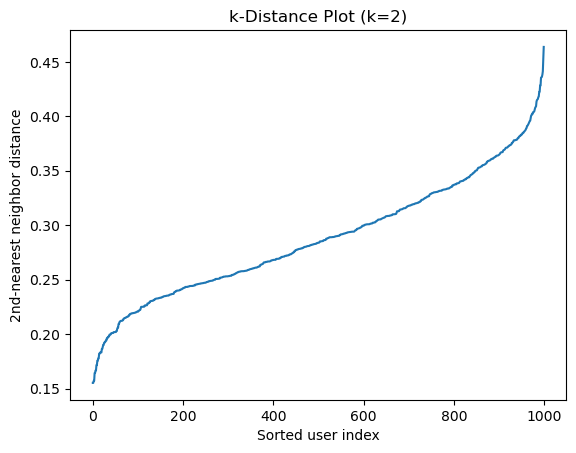

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# After building or reducing X (n_users x n_dims):
nbrs = NearestNeighbors(n_neighbors=2).fit(X_reduced)   # If min_samples=1 or 2
distances, indices = nbrs.kneighbors(X_reduced)
# distances[:, 1] is the distance to each point's 2nd‐nearest neighbor
distances = np.sort(distances[:, 1])
plt.plot(distances)
plt.ylabel("2nd‐nearest neighbor distance")
plt.xlabel("Sorted user index")
plt.title("k‐Distance Plot (k=2)")
plt.show()



In [84]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=15,
    min_samples=3,
    metric='euclidean',
    cluster_selection_method='leaf',
    cluster_selection_epsilon=0.25,
    prediction_data=True
)
clusterer.fit(X_reduced)


HDBSCAN(cluster_selection_epsilon=0.25, cluster_selection_method='leaf',
        min_cluster_size=15, min_samples=3, prediction_data=True)

In [85]:
labels = clusterer.labels_
print(pd.Series(labels).value_counts().sort_index())

-1     598
 0      15
 1      27
 2      45
 3      90
 4      42
 5      36
 6      48
 7      19
 8      15
 9      45
 10     20
Name: count, dtype: int64


In [232]:
!pip install umap

In [233]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
embedding = reducer.fit_transform(X)

plt.scatter(embedding[:,0], embedding[:,1], s=5)
plt.title("2D UMAP of user_features")
plt.show()


AttributeError: module 'umap' has no attribute 'UMAP'

Next Steps After HDBSCAN Clustering

Now that you have:

Preprocessed userds into user_features (numeric matrix).

Fitted HDBSCAN and obtained both hard labels (clusterer.labels_) and soft membership probabilities (approximate_predictor → probabilities).

Built a DataFrame df_memberships indexed by user_id containing:

hard_label for each user (cluster index or -1 for noise)

cluster_0, cluster_1, ..., cluster_{K-1} membership probabilities (soft assignments)

You are ready to proceed with the following steps:

1. Inspect & Validate Clusters

Cluster Size Check: Review cluster_sizes = pd.Series(clusterer.labels_).value_counts().sort_index() to see how many users are in each cluster (and how many are labeled -1 as noise).

Cluster Feature Averages: For each hard cluster, compute the mean of user_features rows to see which features (genres, apps, etc.) are most prominent.

In [ ]:
import pandas as pd

# Example: compute centroids in feature space for each cluster
X_df = pd.DataFrame(X, index=user_ids, columns=user_features.columns)
X_df['hard_label'] = clusterer.labels_
centroids = X_df.groupby('hard_label').mean()
# Inspect top features per cluster
for c in centroids.index:
    if c == -1:
        continue  # skip noise
    top_feats = centroids.loc[c].sort_values(ascending=False).head(10)
    print(f"Cluster {c} top features:")
    print(top_feats)

Visualize (Optional): Use UMAP or t-SNE on X to reduce to 2D/3D, then color points by hard_label to visually inspect cluster separation.

In [ ]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
embedding = reducer.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(embedding[:,0], embedding[:,1], c=labels, cmap='tab10', s=5)
plt.title('HDBSCAN Clusters (2D UMAP)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

2. Generate Cluster Summaries

Identify Defining Features: For each cluster , look at the centroid (mean feature vector) to find which features have the highest values.

For genre tags: those with the highest average count indicate the cluster’s preferred genres.

For app usage: which streaming platform is most popular in that cluster.

For time_spent, month, weekday distributions: see if the cluster has seasonal or day-of-week patterns.

Write a Human-Readable Summary: Use the top features to craft a few-sentence description. For instance:

Cluster 2: "Users in this cluster predominantly watch action and thriller movies on Netflix during weekend evenings. Their average rating is 4.2, and most members are between ages 25–35. Country-wise, they come mostly from the USA and Canada."

Store Summaries: Create a dictionary or DataFrame mapping each cluster index to its summary text:

In [ ]:
cluster_summaries = {}
for c in centroids.index:
    if c == -1:
        continue
    # Extract top 3 genres, top app, top month, top weekday
    # Format into a paragraph and assign to cluster_summaries[c]
    cluster_summaries[c] = "<your summary text>"

3. Build Movie-Cluster Index for Recommendations

Feature-Engineer Movies: Create a movie_feature_matrix in the same feature space as user_features. For each movie_id:

Genres: multi-hot encoding of its genre tags.

Keywords (optional): multi-hot or count of keywords.

Cast (optional): multi-hot of top N cast members.

Release Date: convert to days since a fixed epoch or a normalized recency score.

Popularity: normalize to [0,1].

Compute Cluster Centroids: Use the user centroids from Step 2 as  for each cluster.

Similarity Scoring: For each movie  and cluster , compute a similarity metric between the movie’s feature vector  and the cluster centroid . For example, use cosine similarity:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Suppose movie_features is a DataFrame indexed by movie_id
# and centroids is a DataFrame indexed by cluster c
sim_matrix = cosine_similarity(movie_features.values, centroids.values)
# sim_matrix[i,j] = similarity(movie_i, cluster_centroid_j)

Index Top Movies per Cluster: For each cluster , sort all movie_id by their similarity score to , descending. Keep the top-100 or so for each cluster in a dictionary:

In [ ]:
cluster_to_top_movies = {}
for idx, c in enumerate(centroids.index):
    if c == -1:
        continue
    sims = sim_matrix[:, idx]
    top_indices = np.argsort(sims)[::-1][:200]
    movie_ids_ordered = movie_features.index[top_indices]
    cluster_to_top_movies[c] = movie_ids_ordered.tolist()

Persist Index: Save cluster_to_top_movies (e.g., as a pickle) for fast lookup during recommendation.

4. Prepare User–Watched Index

Build a dictionary mapping each user_id to the set of movies they’ve already seen (so you don’t recommend something they’ve watched).

In [ ]:
user_watched = userds.groupby('user_id')['movie_id'].apply(set).to_dict()

5. Test the Online Query Function

Use the offline artifacts:

df_memberships (user → cluster soft probabilities)

cluster_summaries (cluster → summary text)

cluster_to_top_movies (cluster → list of movie IDs)

user_watched (user → seen set)

Implement the function get_user_cluster_summaries_and_recommendations(user_id) as described in the previous document, then test it on a few sample user_ids:

In [ ]:
result = get_user_cluster_summaries_and_recommendations('user_0001', top_n_movies=5)
print(result['summaries'])
print(result['recommendations'])

Verify that the returned cluster summaries align with your manual interpretation of the clusters and that recommended movies are indeed new to the user.

By following these steps, you will have completed the entire pipeline from raw interactions to HDBSCAN clustering to cluster summaries to user‐based recommendations.